<a href="https://colab.research.google.com/github/amelrnt/Machine_Learning_Project/blob/main/sentiment_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! kaggle datasets download andrewmvd/trip-advisor-hotel-reviews

 19% 1.00M/5.14M [00:00<00:00, 5.75MB/s]
100% 5.14M/5.14M [00:00<00:00, 20.4MB/s]


In [4]:
! unzip trip-advisor-hotel-reviews.zip

Archive:  trip-advisor-hotel-reviews.zip
  inflating: tripadvisor_hotel_reviews.csv  


In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


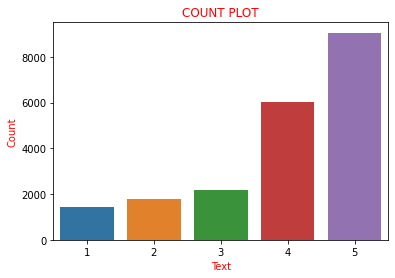

In [9]:
import seaborn as sns   
sns.countplot(df_reviews['Rating'])
plt.xlabel('Text', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1,2,3,4], [1,2,3,4,5])
plt.title('COUNT PLOT', color = 'r')
plt.show()

words on rating 5


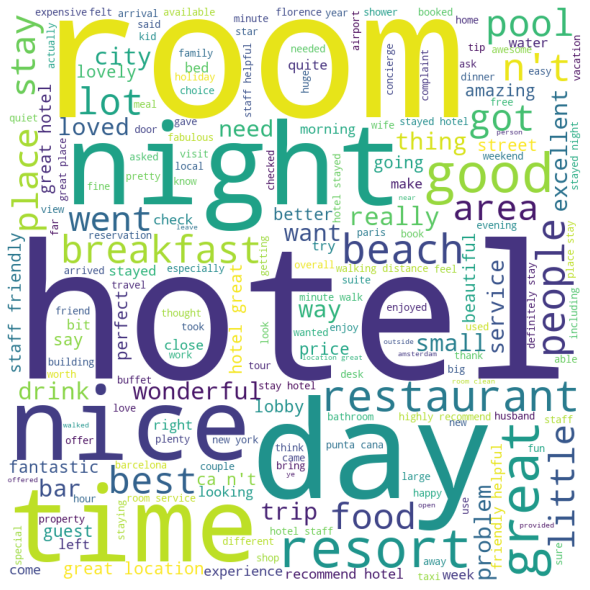

In [20]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_reviews[df_reviews['Rating'] == 5].Review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wc_train = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc_train)
plt.axis("off")
plt.tight_layout(pad = 0)
 
print("words on rating 5")  
plt.show()

words on rating 1


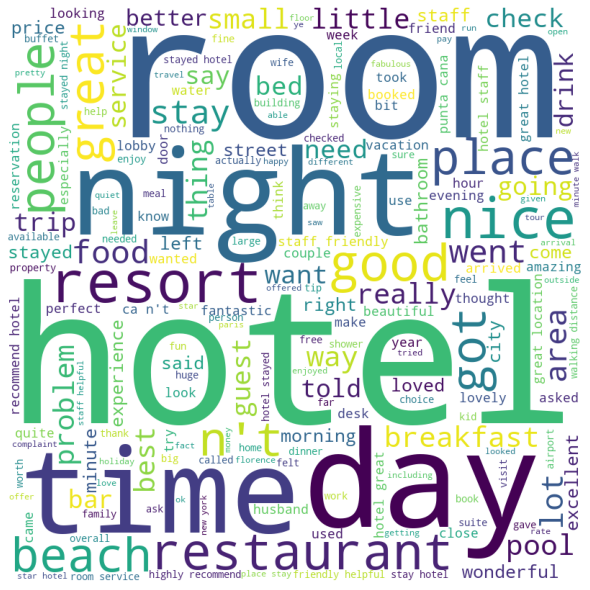

In [22]:
# iterate through the csv file
for val in df_reviews[df_reviews['Rating'] == 1].Review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wc_train = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc_train)
plt.axis("off")
plt.tight_layout(pad = 0)
 
print("words on rating 1")  
plt.show()

In [4]:
import nltk
from nltk.tokenize import RegexpTokenizer, ToktokTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
import unicodedata
import string
import spacy
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [5]:
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

remove_accented_chars('Sómě Áccěntěd těxt. Some words such as résumé, café, prótest, divorcé, coördinate, exposé, latté.')    

'Some Accented text. Some words such as resume, cafe, protest, divorce, coordinate, expose, latte.'

In [6]:
# function to remove numbers
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)
 
# call function
remove_numbers("007 Not sure@ if this % was #fun! 558923 What do# you think** of it.? $500USD!")

' Not sure if this  was fun!  What do you think of it.? USD!'

In [7]:
# function to remove punctuation
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text# call function
remove_punctuation('Article: @First sentence of some, {important} article having lot of ~ punctuations. And another one;!')

'Article First sentence of some important article having lot of  punctuations And another one'

In [8]:
tokenizer = ToktokTokenizer()
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
# custom: removing words from list
stopword_list.remove('not')# function to remove stopwords
def remove_stopwords(text):
    # convert sentence into token of words
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # check in lowercase 
    t = [token for token in tokens if token.lower() not in stopword_list]
    text = ' '.join(t)    
    return text# call function
remove_stopwords("i am myself you the stopwords list and this article is not should removed")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'stopwords list article not removed'

In [9]:
# function to remove special characters
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()# call function
remove_extra_whitespace_tabs('  This web line  has \t some extra  \t   tabs and whitespaces  ')

'This web line has some extra tabs and whitespaces'

In [10]:
# function to remove special characters
def to_lowercase(text):
    return text.lower()# call function
to_lowercase('ConVert THIS string to LOWER cASe.')

'convert this string to lower case.'

In [11]:
nlp = spacy.load('en',parse=True,tag=True, entity=True)# function to remove special characters
def get_lem(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text# call function
get_lem("we are eating and swimming ; we have been eating and swimming ; he eats and swims ; he ate and swam ")

'we be eat and swim ; we have be eat and swim ; he eat and swim ; he eat and swam'

In [12]:
words = set(nltk.corpus.words.words())
def remove_non_eng(text):
  text = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
  return text

sent = "Io andiamo to the beach with my amico."
remove_non_eng(sent)

'Io to the beach with my .'

In [13]:
def cleaning_single_text(text):
  text = text.replace("'", "\\\'")
  text = text.replace('"', "'")
  text = to_lowercase(text)
  text = remove_extra_whitespace_tabs(text)
  text = remove_stopwords(text)
  text = remove_punctuation(text)
  text = remove_numbers(text)
  text = remove_accented_chars(text)
  text = remove_non_eng(text)
  # text = get_lem(text)
  return text

In [14]:
df_train = pd.read_csv('tripadvisor_hotel_reviews.csv')

df_train

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [15]:
for i in range(len(df_train)):
    df_train.loc[i, "Review"] = cleaning_single_text(df_train.Review[i])

In [16]:
x_train1 = df_train
y_train1 = x_train1.pop('Rating')

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer()
features_train1 = vectorizer1.fit_transform(x_train1.Review)

In [18]:
print(vectorizer1.get_feature_names())
print(features_train1.shape)

['aa', 'abac', 'aback', 'abalone', 'abandon', 'abandoned', 'abbey', 'abbot', 'abdication', 'abdomen', 'abdominal', 'abide', 'abiding', 'abigail', 'ability', 'able', 'abnormal', 'aboard', 'abode', 'abominable', 'aboriginal', 'aborted', 'abound', 'about', 'above', 'aboveground', 'abrasive', 'abreast', 'abroad', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absent', 'absentee', 'absentmindedly', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorber', 'absorbing', 'absorption', 'abstract', 'absurd', 'absurdly', 'abundance', 'abundant', 'abundantly', 'abuse', 'abusive', 'abut', 'abysmal', 'abysmally', 'academic', 'academician', 'academy', 'acapulco', 'acca', 'accelerate', 'accelerator', 'accent', 'accentuate', 'accept', 'acceptable', 'acceptably', 'acceptance', 'accepted', 'acception', 'access', 'accessibility', 'accessible', 'accessory', 'accident', 'accidental', 'accidentally', 'accidently', 'accolade', 'accommodate', 'accommodating', 'accommodation', 'accommodative', 'accompaniment

In [19]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(features_train1.toarray(), y_train1.values)

score_train = model1.score(features_train1.toarray(), y_train1.values)

print(score_train)

0.4685959689619833


In [20]:
pred_text = "such a great place to stay in, will never forget"
pred_text = [pred_text]
pred_vec = vectorizer1.transform(pred_text)
prediction = model1.predict(pred_vec.toarray())
print(prediction)

[5]


In [21]:
pred_text = "hotel theft ruined vacation, nothing special"
pred_text = [pred_text]
pred_vec = vectorizer1.transform(pred_text)
prediction = model1.predict(pred_vec.toarray())
print(prediction)

[1]


In [48]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))